# The Model

__Supply__

Consider a linear supply function:

qs = a + bp; 

- qs = quantity supplied by the market
- p = market price
- a = quantity supplied at a zero price (y intercept of the supply function)
- b  = the change in units supplied in response to a price change (slope of supply function)

Markets are usually represented visually with price on the vertical axis. The inverse supply function makes price as the dependent variable. The aforementioned supply function solved for p gives:

- p =  (- a + qs) / b 

__Demand__

The linear demand function is:

- qd = c + dp

- qd = quantity demanded in the market
- p = market price
- a = quantity demanded at a zero price (y intercept of the demand function)
- b  = the change in units demanded in response to a price change (slope of demand function)

The inverse is:

- p = (- c + qd) / d 

__Equilibrium__

In equilibrium, quantity supplied equals quantity demanded so there qs=qd, and the inverse functions being equal means:

- a/b + qs / b = - c/d + qd/d

Solving algebraically, 

-	q  =  (ad−bc) / (-b+d)

The market is coded as a class

In [2]:
# Coding the market as a class

class Market:

    def __init__(self, sa, sb, dc, dd):  # Initiate with the values for demand and supply (their intercepts and slopes)

        self.sa = sa  # Supply intercept
        self.sb = sb  # Supply slope
        self.dc = dc  # Demand intercept
        self.dd = dd  # Demand slope

    def supply(self, p):
        return self.sa + self.sb * p
    
    def demand(self, p):
        return self.dc + self.dd * p
        
    def inverse_supply(self, q):  # Generate the inverse supply function - price required to deliver quantity q  
        return (-self.sa + q) / self.sb

    def inverse_demand(self, q):  # Inverse demand - price required to purchase quantity q
        return (-self.dc + q) / self.dd

    def equilibrium(self):
        eq_q = (self.sa * self.dd - self.sb * self.dc) / (-self.sb + self.dd)  # The solution for equilibrium
        eq_p = (-self.sa + eq_q) / self.sb  # Equilibrium price obtained from supply function at equilibrium quantity 
        return eq_q, eq_p



The market equilibrium is coded as a function which can be called on various market parameters

Equil. Quantitiy is: 60.0
Equil. Price is: 15.0


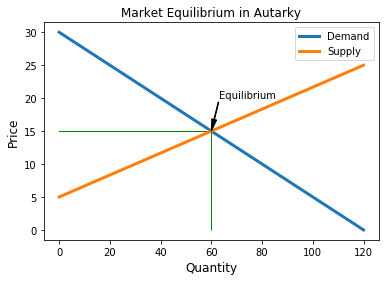

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def chart_equil(a, b, c, d):
    '''A function that derives the supply and demand graphs for the 
    specified market parameters to display equilibrium'''
    
    m = Market(a, b, c, d)
    
    max_d = m.demand(0)  # Find the max demand to determine correct chart scaling
    grid = np.linspace( 0, m.dc, num=10 )  # A numpy array with 10 evenly spaced numebrs from 0 to 12 - will be used as the x-axis

    pd = m.inverse_demand(grid)
    ps = m.inverse_supply(grid)   
    
    min_p = min(min(pd), min(ps))

    q, p = m.equilibrium()

    equil_price = [p for i in range(0,int(q))]
    equil_price.append(p)
    
    print ('Equil. Quantitiy is:', round(q,2))
    print ('Equil. Price is:', round(p,2))

    fig, ax = plt.subplots()

    ax.plot()
    ax.plot(equil_price, linewidth=1, color='g')
    ax.plot(grid, pd, linewidth=3, label='Demand')
    ax.plot(grid, ps, linewidth=3, label='Supply')
    ax.set_xlabel('Quantity', fontsize=12)
    ax.set_ylabel('Price', fontsize=12)
    ax.set_title('Market Equilibrium in Autarky')
    
    plt.annotate('Equilibrium',xy = (q, p), xytext = (q+3, p+5), 
             arrowprops={'facecolor':'black', 'width':0.6, 'headwidth':5})

    ax.vlines(x=q, ymin=min_p,ymax=p, color='g', linewidth=1)

    plt.legend()
    plt.show()

chart_equil(-30, 6, 120, -4)

# Open Economy

Units bought are: 90
Total expenditure is: 900
Domestic Supply is: 30
Producer Revenue is: 300
Imports are:  60
Forex is: -600


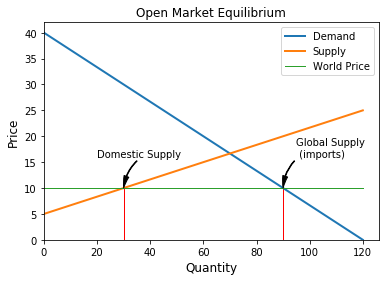

In [45]:
def open_equil(a, b, c, d, p):
    '''A function that derives the supply and demand graphs for the 
    specified market parameters to display equilibrium'''
    
    m = Market(a, b, c, d)
    
    grid = np.linspace( 0, m.dc, num=10 )  # A numpy array with 10 evenly spaced numebrs from 0 to 12 - will be used as the x-axis

    pd = m.inverse_demand(grid)
    ps = m.inverse_supply(grid)   
    
    min_p = min(min(pd), min(ps))
    max_p = max(max(pd), max(ps))

    eq_q, eq_p = m.equilibrium()
    
    world_price = [p for i in grid]

    equil_price = [eq_p for i in range(0,int(eq_q))]
    equil_price.append(p)
    
    imports = (m.demand(p) - m.supply(p))

    qs = m.supply(p)
    qd = m.demand(p)
    
    print('Units bought are:',qd)
    print('Total expenditure is:',qd*p)
    print('Domestic Supply is:',qs)
    print('Producer Revenue is:',qs*p)
    print('Imports are: ',imports)
    print('Forex is:',imports * -p)

    fig, ax = plt.subplots()

    ax.plot()
    #ax.plot(equil_price, linewidth=1, color='g')
    ax.plot(grid, pd, linewidth=2, label='Demand')
    ax.plot(grid, ps, linewidth=2, label='Supply')
    ax.plot(grid, world_price, linewidth=1, label='World Price')
    ax.set_xlabel('Quantity', fontsize=12)
    ax.set_ylabel('Price', fontsize=12)
    ax.set_ylim(0)
    ax.set_xlim(0)
    ax.set_title('Open Market Equilibrium')

    ax.vlines(x=m.supply(p), ymin=min_p,ymax=p, color='r', linewidth=1)
    ax.vlines(x=m.demand(p), ymin=min_p,ymax=p, color='r', linewidth=1)

    plt.annotate('Domestic Supply',xy = (qs, p), xytext = (qs-10, p+6), 
             arrowprops=dict(facecolor='black', width=0.6, headwidth=5, connectionstyle="arc3,rad=.2"))

    plt.annotate('Global Supply\n (imports)',xy = (qd, p), xytext = (qd+5, p+6), 
             arrowprops=dict(facecolor='black', width=0.6, headwidth=5, connectionstyle="arc3,rad=0.2"))

    
    plt.legend()
    plt.show()

open_equil(-30, 6, 120, -3, 10)

## Open economy with tariffs

Units bought are: 72
Total expenditure is: 864
Domestic Supply is: 42
Producer Revenue is: 864
Imports are:  30
Forex is: -300
Government Revenue is: 60


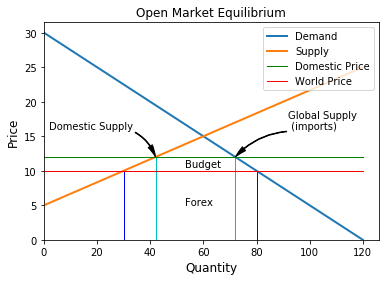

In [71]:
def tariff_equil(a, b, c, d, p, t):
    '''A function that derives the supply and demand graphs for the 
    specified market parameters to display equilibrium'''

    pdom = p+t
    m = Market(a, b, c, d)
    
    grid = np.linspace( 0, m.dc, num=10 )  # A numpy array with 10 evenly spaced numebrs from 0 to 12 - will be used as the x-axis

    pd = m.inverse_demand(grid)
    ps = m.inverse_supply(grid)   
    
    min_p = min(min(pd), min(ps))
    max_p = max(max(pd), max(ps))

    world_price = [p for i in grid]
    dom_price = [pdom for j in grid]
    #print(dom_price)
    
    imports = (m.demand(pdom) - m.supply(pdom))

    qs = m.supply(pdom)
    qd = m.demand(pdom)
    
    print('Units bought are:',qd)
    print('Total expenditure is:',qd*pdom)
    print('Domestic Supply is:',qs)
    print('Producer Revenue is:',qd*pdom)
    print('Imports are: ',imports)
    print('Forex is:',imports * -p)
    print('Government Revenue is:',imports * (pdom - p))

    fig = plt.figure()

    ax = fig.add_subplot(1,1,1)

    #ax.plot()
    ax.plot(grid, pd, linewidth=2, label='Demand')
    ax.plot(grid, ps, linewidth=2, label='Supply')
    ax.plot(grid, dom_price, linewidth=1, label='Domestic Price', color='g')
    ax.plot(grid, world_price, linewidth=1, label='World Price', color='r')
    ax.set_xlabel('Quantity', fontsize=12)
    ax.set_ylabel('Price', fontsize=12)
    ax.set_ylim(0)
    ax.set_xlim(0)
    ax.set_title('Open Market Equilibrium')

    ax.vlines(x=m.supply(p), ymin=min_p,ymax=p, color='b', linewidth=1)
    ax.vlines(x=m.demand(p), ymin=min_p,ymax=p, color='b', linewidth=1)
    ax.vlines(x=m.demand(pdom), ymin=min_p,ymax=pdom, color='c', linewidth=1)
    ax.vlines(x=m.supply(pdom), ymin=min_p,ymax=pdom, color='c', linewidth=1)

    plt.annotate('Forex',xy = (m.demand(pdom), p/2), xytext = (m.supply(pdom) + 11, p/2))
    plt.annotate('Budget',xy = (m.demand(pdom), p +1), xytext = (m.supply(pdom) + 11, p +0.5))

    plt.annotate('Domestic Supply',xy = (qs, pdom), xytext = (qs-40, pdom+4), 
             arrowprops=dict(facecolor='black', width=0.6, headwidth=5, connectionstyle="arc3,rad=-.2"))

    plt.annotate('Global Supply\n (imports)',xy = (qd, pdom), xytext = (qd+20, pdom+4), 
             arrowprops=dict(facecolor='black', width=0.6, headwidth=5, connectionstyle="arc3,rad=0.2"))

   
    plt.legend(loc='upper right')
    plt.show()

tariff_equil(-30, 6, 120, -4, 10, 2)

# Tariff function

Units bought are: 72
Total expenditure is: 864
Domestic Supply is: 42
Producer Revenue is: 504
Imports are:  30
Forex is: -300
Government Revenue is: 60


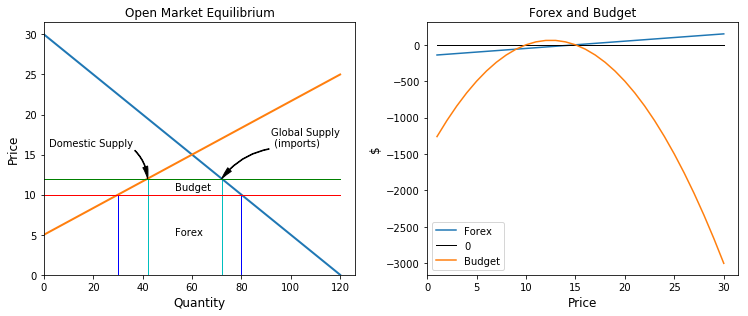

In [79]:
def tariff_equil_b(a, b, c, d, p, t):
    '''A function that derives the supply and demand graphs for the 
    specified market parameters to display equilibrium'''

    pdom = p+t
    m = Market(a, b, c, d)
    
    grid = np.linspace( 0, m.dc, num=10 )  # A numpy array with 10 evenly spaced numebrs from 0 to 12 - will be used as the x-axis
    
    
    pd = m.inverse_demand(grid)
    ps = m.inverse_supply(grid)   
    
    min_p = min(min(pd), min(ps))
    max_p = max(max(pd), max(ps))

    world_price = [p for i in grid]
    dom_price = [pdom for j in grid]
    #print(dom_price)
    
    imports = (m.demand(pdom) - m.supply(pdom))

    qs = m.supply(pdom)
    qd = m.demand(pdom)
    
    print('Units bought are:',qd)
    print('Total expenditure is:',qd*pdom)
    print('Domestic Supply is:',qs)
    print('Producer Revenue is:',qs*pdom)
    print('Imports are: ',imports)
    print('Forex is:',imports * -p)
    print('Government Revenue is:',imports * (pdom - p))

    fig = plt.figure(figsize=(10.5,4.5))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

    #ax.plot()
    ax1.plot(grid, pd, linewidth=2, label='Demand')
    ax1.plot(grid, ps, linewidth=2, label='Supply')
    ax1.plot(grid, dom_price, linewidth=1, label='Domestic Price', color='g')
    ax1.plot(grid, world_price, linewidth=1, label='World Price', color='r')
    ax1.set_xlabel('Quantity', fontsize=12)
    ax1.set_ylabel('Price', fontsize=12)
    ax1.set_ylim(0)
    ax1.set_xlim(0)
    ax1.set_title('Open Market Equilibrium')

    ax1.vlines(x=m.supply(p), ymin=min_p,ymax=p, color='b', linewidth=1)
    ax1.vlines(x=m.demand(p), ymin=min_p,ymax=p, color='b', linewidth=1)
    ax1.vlines(x=m.demand(pdom), ymin=min_p,ymax=pdom, color='c', linewidth=1)
    ax1.vlines(x=m.supply(pdom), ymin=min_p,ymax=pdom, color='c', linewidth=1)

    ax1.annotate('Forex',xy = (m.demand(pdom), p/2), xytext = (m.supply(pdom) + 11, p/2))
    ax1.annotate('Budget',xy = (m.demand(pdom), p +1), xytext = (m.supply(pdom) + 11, p +0.5))

    ax1.annotate('Domestic Supply',xy = (qs, pdom), xytext = (qs-40, pdom+4), 
             arrowprops=dict(facecolor='black', width=0.6, headwidth=5, connectionstyle="arc3,rad=-.2"))

    ax1.annotate('Global Supply\n (imports)',xy = (qd, pdom), xytext = (qd+20, pdom+4), 
             arrowprops=dict(facecolor='black', width=0.6, headwidth=5, connectionstyle="arc3,rad=0.2"))


    # Define the price range (x axis) and forex earnigns at these prices
    price_range = list(range(1,int(max_p+1)))
    forex = [(-(m.demand(price) - m.supply(price))) for price in price_range]
    zeroes = [0 for i in price_range]
    
    budget = [(((m.demand(price) - m.supply(price))) * (price - p)) for price in price_range]

    #plot the forex and government budget
    ax2.plot(price_range, forex, label='Forex')
    ax2.plot(price_range, zeroes, label='0', linewidth=1, color='black')
    ax2.plot(price_range, budget, label='Budget')
    ax2.set_xlim(0)
    #ax2.set_ylim(0)
    ax2.set_xlabel('Price', fontsize=12)
    ax2.set_title('Forex and Budget')
    ax2.set_ylabel('$', fontsize=12)
    
    plt.legend()
    
    plt.tight_layout()
    plt.show()

tariff_equil_b(-30, 6, 120, -4, 10, 2)